<a href="https://colab.research.google.com/github/tinouirini/Homework/blob/main/hmw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#!python -m spacy download el_core_news_sm!python -m spacy download el_core_news_sm

In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [64]:
may_df=pd.read_csv("/content/gdrive/MyDrive/ertnews.gr-MAY23.csv")
may_df.head()

,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...


In [65]:
may_df.tail()

,site,url,date,section,title,author,text
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...
4879,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,Άγρια κόντρα Πλεύρη – Ηλιόπουλου στο Twitter γ...,Συντακτική Ομάδα ertnews.gr,Κόντρα ξέσπασε μεταξύ του πρωην Υπουργού Υγεία...


In [66]:
may_df=may_df.drop_duplicates(subset=["title"])
may_df=may_df.dropna()
may_df.reset_index(inplace=True , drop=True)


In [67]:

may_df.tail()

,site,url,date,section,title,author,text
4863,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4864,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4865,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4866,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...
4867,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,Άγρια κόντρα Πλεύρη – Ηλιόπουλου στο Twitter γ...,Συντακτική Ομάδα ertnews.gr,Κόντρα ξέσπασε μεταξύ του πρωην Υπουργού Υγεία...


In [68]:

import spacy


nlp = spacy.load("el_core_news_sm")


may_dff=pd.read_csv("/content/gdrive/MyDrive/ertnews.gr-MAY23.csv")



may_dff=may_dff.drop_duplicates(subset=["title"])
may_dff=may_dff.dropna()
may_dff.reset_index(inplace=True , drop=True)

In [69]:
dt_may_df=may_dff[["date", "text"]]
dt_may_df.tail()

,date,text
4863,2023-05-31,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4864,2023-05-31,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4865,2023-05-31,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4866,2023-05-31,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...
4867,2023-05-31,Κόντρα ξέσπασε μεταξύ του πρωην Υπουργού Υγεία...


In [70]:
dt_may_df["date"]=pd.to_datetime(dt_may_df["date"], format="%Y-%m-%d")

<ipython-input-70-f652d9713c30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_may_df["date"]=pd.to_datetime(dt_may_df["date"], format="%Y-%m-%d")


In [71]:
emolex_csv_path = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(emolex_csv_path)
emolex_df.tail(1)


,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)
emolex_df.tail(1)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
custom_stopwords = ['ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ']



In [74]:
nlp.Defaults.stop_words |= {i for i in custom_stopwords if i not in list(nlp.Defaults.stop_words)}

In [75]:
positive_words_df = emolex_df[emolex_df.Positive == 1][['word']]
positive_words_df = positive_words_df.rename(columns={"word":"positive_words"}).reset_index(drop=True)

negative_words_df = emolex_df[emolex_df.Negative == 1][['word']]
negative_words_df = negative_words_df.rename(columns={"word":"negative_words"}).reset_index(drop=True)

angry_words_df = emolex_df[emolex_df.Anger == 1][['word']]
angry_words_df = angry_words_df.rename(columns={"word":"angry_words"}).reset_index(drop=True)

anticipation_words_df = emolex_df[emolex_df.Anticipation == 1][['word']]
anticipation_words_df = anticipation_words_df.rename(columns={"word":"anticipation_words"}).reset_index(drop=True)

disgust_words_df = emolex_df[emolex_df.Disgust == 1][['word']]
disgust_words_df = disgust_words_df.rename(columns={"word":"disgust_words"}).reset_index(drop=True)

fear_words_df = emolex_df[emolex_df.Fear == 1][['word']]
fear_words_df = fear_words_df.rename(columns={"word":"fear_words"}).reset_index(drop=True)

joy_words_df = emolex_df[emolex_df.Joy == 1][['word']]
joy_words_df = joy_words_df.rename(columns={"word":"joy_words"}).reset_index(drop=True)

sadness_words_df = emolex_df[emolex_df.Sadness == 1][['word']]
sadness_words_df = sadness_words_df.rename(columns={"word":"sadness_words"}).reset_index(drop=True)

surprise_words_df = emolex_df[emolex_df.Surprise == 1][['word']]
surprise_words_df = surprise_words_df.rename(columns={"word":"surprise_words"}).reset_index(drop=True)

trust_words_df = emolex_df[emolex_df.Trust == 1][['word']]
trust_words_df = trust_words_df.rename(columns={"word":"trust_words"}).reset_index(drop=True)




In [76]:

dfList = [emolex_df[["word"]],
          positive_words_df,
          negative_words_df,
          angry_words_df,
          anticipation_words_df,
          disgust_words_df,
          fear_words_df,
          joy_words_df,
          sadness_words_df,
          surprise_words_df,
          trust_words_df]

In [77]:
emotions_df = pd.concat(dfList,axis=1)


In [78]:
emotions_df.tail(1)

,word,positive_words,negative_words,angry_words,anticipation_words,disgust_words,fear_words,joy_words,sadness_words,surprise_words,trust_words
13160,ζουμ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
from sklearn.feature_extraction.text import CountVectorizer


emotions_df.to_csv("/content/gdrive/MyDrive/emotion_words.csv", index=False)


emotion_words_df = pd.read_csv("/content/gdrive/MyDrive/emotion_words.csv")
emotion_words_df.tail(1)

,word,positive_words,negative_words,angry_words,anticipation_words,disgust_words,fear_words,joy_words,sadness_words,surprise_words,trust_words
13160,ζουμ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [81]:
matrix = vec.fit_transform(dt_may_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακριβως', 'αλλαχου', 'αλλην', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αμα', 'αμεσα', 'αμεσως', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'αποψε', 'αρκετες', 'αρχικα', 'αφοτου', 'βεβαια', 'βεβαιοτατα', 'γρηγορα', 'γυρω', 'δεξια', 'δηθεν', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 'εγκαιρα', 'εγκαιρως', 'εγω', 'εδω', 'ειμαι', 'ειμαστε', 'ειναι', 'εισαι', 'εισαστε', 'ειστε', 'ειχα', 'ειχαμε', 'ειχαν', 'ειχατε', 'ειχε', 'ειχες', 'εκανε', 'εναντιον', 'εξαιτιας', 'εξησ', 'εξι', 'επομενη', 'ευγε', 'ευτυχως', 'εχει', 'εχεις', 'εχετε', 'εχομε', 'εχοντας', 'εχου

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']


In [83]:
fear_words

6                        υδρα
9                      απατσι
27           δευτερα παρουσια
36                   εξαρτηση
69               λυρικη σκηνη
                 ...         
13124                προϊοντα
13129                 σπαταλω
13144    ανεξελεγκτη πυρκαγια
13147                 αλιμονο
13156               ουρλιασμα
Name: word, Length: 1593, dtype: object

In [84]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
4867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
wordcount_df[anticipation_words].tail(1)

,γαμηλιο ταξιδι,γνωστοποιηση,δευτερα παρουσια,εγγραφειτε,εκκλησια,λυρικη σκηνη,μισθος,περιμενετε,προσοχη,σεβασμος,...,ηλιακο ωρολογιο,δυση του ηλιου,ακμαζουσα,ηλεκτρικος διαδρομος,ανοιγοκλειω τα βλεφαρα,ξεδιπλωνονται,ανυπερβατος,ανεπιβεβαιωτος,ανηφορικος δρομος,ταξιδι στη θαλασσα
4867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
wordcount_df[anticipation_words].sum(axis=1)

0       2
1       1
2       2
3       1
4       2
       ..
4863    3
4864    3
4865    1
4866    1
4867    2
Length: 4868, dtype: int64

In [87]:

dt_may_df.head(10)

,date,text
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,2023-05-01,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,2023-05-01,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,2023-05-01,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...
5,2023-05-01,Ο απολογισμός των θυμάτων του ουκρανικού βομβα...
6,2023-05-01,Ο υποψήφιος του κυβερνώντος κόμματος Colorado ...
7,2023-05-01,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
8,2023-05-02,Εντείνεται η πολιτική αντιπαράθεση στον δρόμο ...
9,2023-05-02,Επεισόδια ξέσπασαν χθες Δευτέρα το μεσημέρι στ...


In [88]:
dt_may_df['anger'] = wordcount_df[angry_words].sum(axis=1)

dt_may_df['positive'] = wordcount_df[positive_words].sum(axis=1)

dt_may_df['joy'] = wordcount_df[joy_words].sum(axis=1)

dt_may_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

dt_may_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
dt_may_df['trust'] = wordcount_df[trust_words].sum(axis=1)

dt_may_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

dt_may_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

dt_may_df['negative'] = wordcount_df[negative_words].sum(axis=1)

dt_may_df['fear'] = wordcount_df[fear_words].sum(axis=1)




<ipython-input-88-cb95e30d43ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_may_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-88-cb95e30d43ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_may_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-88-cb95e30d43ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [89]:
dt_may_df


,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ...",0,4,1,1,1,3,2,0,0,0
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,1,3,1,0,1,1,1,1,4,1
2,2023-05-01,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...,1,6,2,1,1,1,2,1,1,1
3,2023-05-01,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...,1,2,0,0,0,0,1,0,1,1
4,2023-05-01,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...,0,3,0,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4863,2023-05-31,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...,9,17,2,9,7,7,3,10,15,10
4864,2023-05-31,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...,5,11,2,3,2,8,3,1,8,4
4865,2023-05-31,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...,0,2,0,2,0,2,1,0,0,0
4866,2023-05-31,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...,2,1,0,0,0,1,1,4,3,2


In [90]:
dt_may_df.reset_index(inplace=True)
dt_may_df.set_index("date", inplace=True)
dt_may_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-05-01,0,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ...",0,4,1,1,1,3,2,0,0,0
2023-05-01,1,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,1,3,1,0,1,1,1,1,4,1
2023-05-01,2,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...,1,6,2,1,1,1,2,1,1,1
2023-05-01,3,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...,1,2,0,0,0,0,1,0,1,1
2023-05-01,4,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...,0,3,0,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,4863,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...,9,17,2,9,7,7,3,10,15,10
2023-05-31,4864,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...,5,11,2,3,2,8,3,1,8,4
2023-05-31,4865,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...,0,2,0,2,0,2,1,0,0,0


<Axes: xlabel='date'>

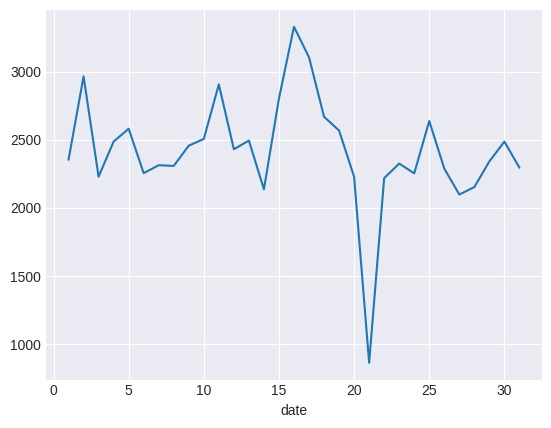

In [91]:
dt_may_df['text'].str.len().groupby(by=dt_may_df.index.day).mean().plot()

<Axes: ylabel='date'>

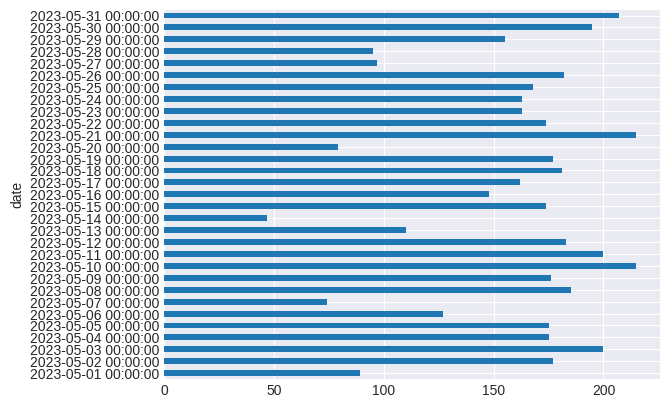

In [92]:
dt_may_df['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='date'>

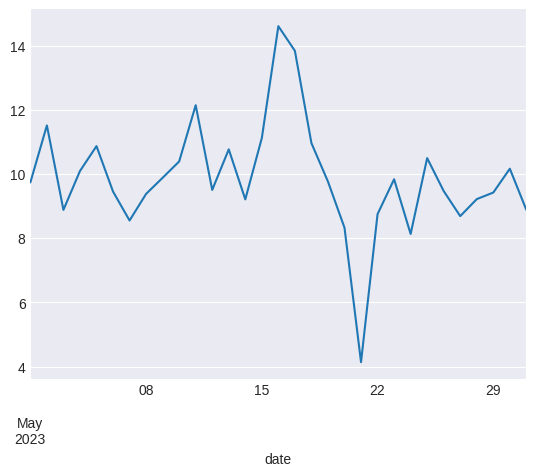

In [93]:
dt_may_df['positive'].resample('D').mean().plot()

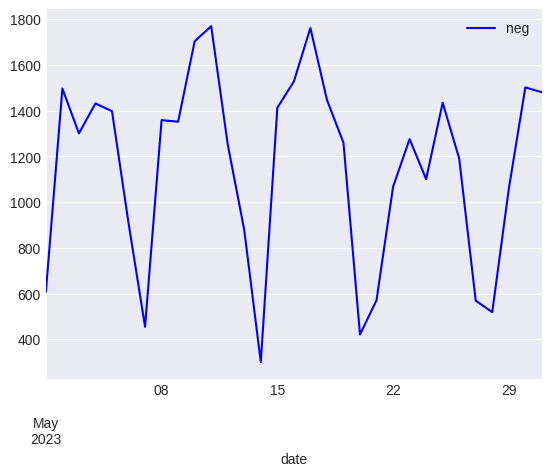

In [94]:
dt_may_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

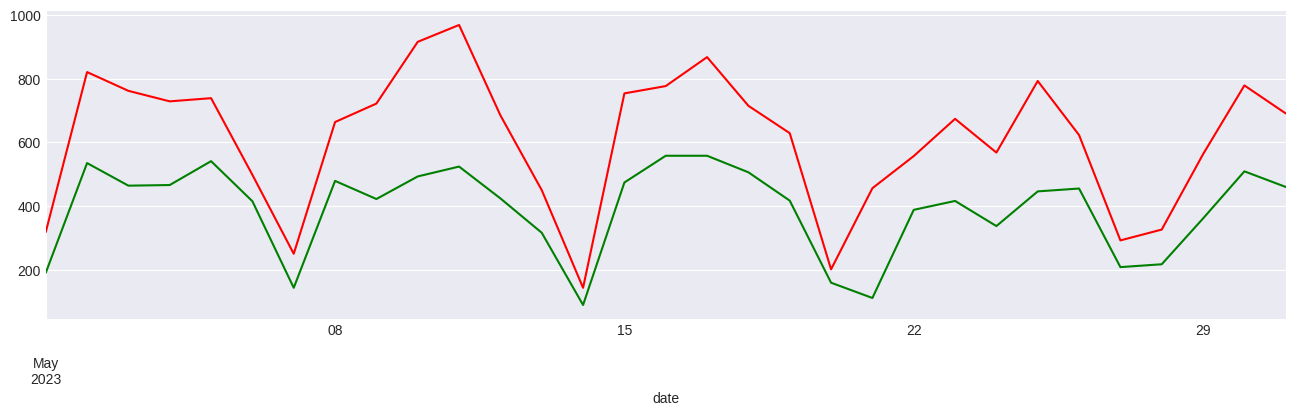

In [95]:
ax = dt_may_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
dt_may_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

In [96]:
import matplotlib.pyplot as plt
plt.style.use('default')

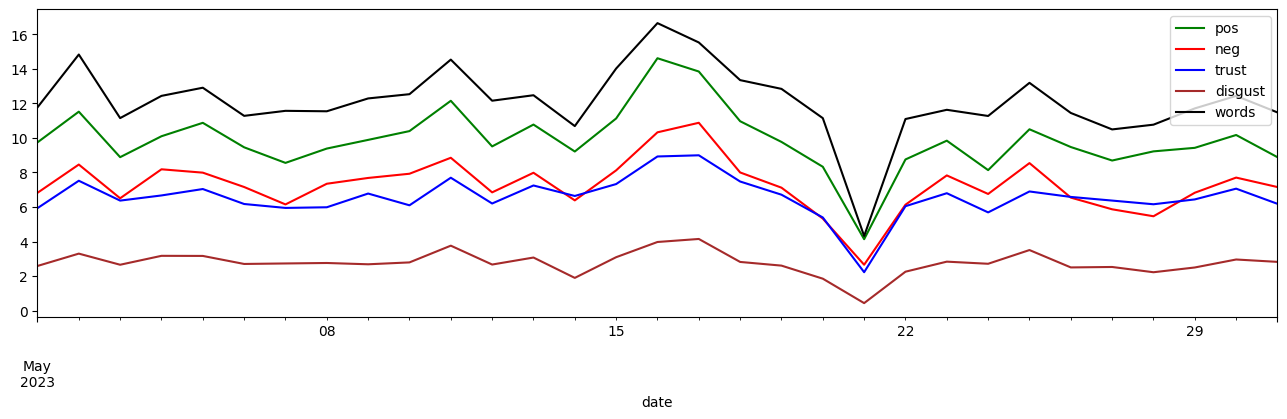

In [97]:
ax = dt_may_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
dt_may_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
dt_may_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
dt_may_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(dt_may_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax,
                                                label = 'words',color = 'black').legend()

In [98]:

plt.style.use('seaborn-v0_8-darkgrid')



<Axes: xlabel='date'>

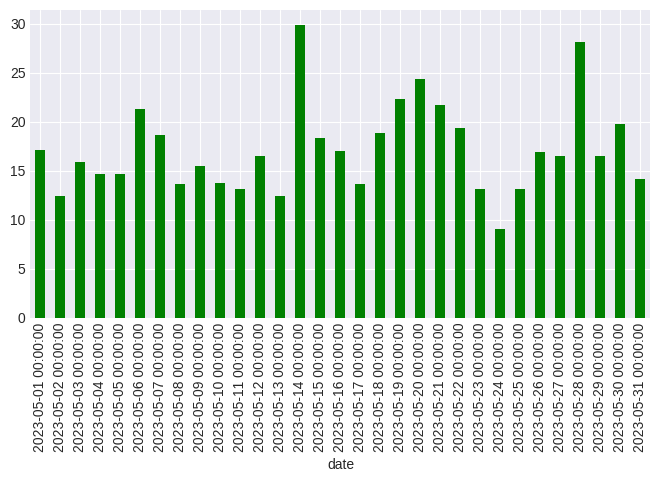

In [99]:
dt_may_df['(-)αρνητικότητα | θετικότητα(+)'] = dt_may_df.positive*100//dt_may_df[['positive','negative']].sum(
        axis=1) - dt_may_df.negative*100//dt_may_df[['positive','negative']].sum(axis=1)

dt_may_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(dt_may_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [100]:
dt_may_df[(dt_may_df['(-)αρνητικότητα | θετικότητα(+)'] == dt_may_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (dt_may_df['(-)αρνητικότητα | θετικότητα(+)'] == dt_may_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]


,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-05-01,0,4,0,100.0
2023-05-01,4,3,0,100.0
2023-05-01,5,0,2,-100.0
2023-05-01,37,4,0,100.0
2023-05-02,50,0,3,-100.0
...,...,...,...,...
2023-05-31,4835,0,1,-100.0
2023-05-31,4841,3,0,100.0
2023-05-31,4850,1,0,100.0


In [101]:
may_dff.loc[[20,104,118], ['url','title', 'text']]


,url,title,text
20,https://www.ertnews.gr/eidiseis/diethni/t-ernt...,Τ. Ερντογάν: Ο «φερόμενος ηγέτης» του ISIS «εξ...,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...
104,https://www.ertnews.gr/roi-idiseon/syriza-i-pr...,ΣΥΡΙΖΑ: Η Πρωτομαγιά είναι ταυτισμένη με την δ...,Δήλωση έκανε η εκπροσώπος Τύπου του ΣΥΡΙΖΑ Προ...
118,https://www.ertnews.gr/eidiseis/ellada/dodeka-...,Δώδεκα νεκροί και 578 τραυματίες σε 494 τροχαί...,Δώδεκα άτομα έχασαν τη ζωή τους και 578 τραυμα...
